In [131]:
# Imports

import pandas as pd
import numpy as ny

import matplotlib.pyplot as plt
import seaborn as sns

In [29]:
# showing all dataframe columns:

pd.set_option('display.max_columns', None)

In [30]:
# set matplotlib global settings eg. figsize:
plt.rcParams['figure.figsize'] = (8.0, 6.0)

In [31]:
# Read London Airbnb Data
airbnb_ldn = pd.read_csv('data/LondonData.csv')

Option settings:

In [32]:
airbnb_ldn.head().T

,0,1,2,3,4
Listing Title,Twin Ensuite with Shower at Colnbrook Lodge Gu...,Single Shared Bathroom at Colnbrook Lodge Gues...,Luxury New Alpine Lodge in Private Walled Garden,Chessington World of Adventures House,Charming house -15min to London
Property Type,Private room in guesthouse,Private room in guesthouse,Entire cabin,Entire home,Private room in home
Listing Type,private_room,private_room,entire_home,entire_home,private_room
Created Date,2022-07-23,2022-07-23,2023-01-18,2022-07-22,2022-12-12
Last Scraped Date,2022-07-27,2022-08-03,2023-05-03,2022-08-03,2023-10-11
Country,GB,GB,GB,GB,GB
State,UK,UK,UK,UK,UK
City,Colnbrook,Colnbrook,Claygate,Greater London,Chessington
Zipcode,SL3 0,SL3 0,KT10 0,KT9 2,KT9 2
Currency Native,GBP,GBP,GBP,GBP,GBP


In [33]:
# checking dimensions of dataframe:
airbnb_ldn.shape

(43580, 54)

The dataframe consists of 54 columns and 43580 rows.

In [34]:
# More thorough check of data included in dataset:
airbnb_ldn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43580 entries, 0 to 43579
Data columns (total 54 columns):
 #   Column                                             Non-Null Count  Dtype  
---  ------                                             --------------  -----  
 0   Listing Title                                      43576 non-null  object 
 1   Property Type                                      43580 non-null  object 
 2   Listing Type                                       43580 non-null  object 
 3   Created Date                                       43580 non-null  object 
 4   Last Scraped Date                                  43580 non-null  object 
 5   Country                                            43580 non-null  object 
 6   State                                              43580 non-null  object 
 7   City                                               43580 non-null  object 
 8   Zipcode                                            43580 non-null  object 
 9   Curren

Some more indepth analysis of the various columns will be conducted. 

Any columns that are not necessary for the modelling process shall be dropped. 
- Columns that are semantically the same will be dropped.
- Columns that do not serve any relevant purpose and don't add additional value to the future insights will be dropped.

To begin:
The two columns 'country' and 'state' can be dropped. As this is the London dataset, all the pieces of data on these columns will be the same and won't serve any values. 

A quick check will be conducted, to ensure these columns do not have any greater value than initially assumed:

In [35]:
# checking data within the 'Country' column:
airbnb_ldn['Country'].value_counts()

Country
GB    43580
Name: count, dtype: int64

It can be seen that all rows in the country column have the same data 'GB', this can be dropped.

In [36]:
# checking the data within the 'state' column:
airbnb_ldn['State'].value_counts()

State
UK    43580
Name: count, dtype: int64

All data in the state column is the same information 'UK', this column can also be dropped.

In [37]:
# dropping country and state columns:
airbnb_ldn.drop(columns =['Country', 'State'], inplace=True )

In [38]:
# check these columns have been dropped:
print(airbnb_ldn.shape)
airbnb_ldn.columns

(43580, 52)


Index(['Listing Title', 'Property Type', 'Listing Type', 'Created Date',
       'Last Scraped Date', 'City', 'Zipcode', 'Currency Native',
       'Number of Reviews', 'Bedrooms', 'Bathrooms', 'Max Guests',
       'Airbnb Superhost', 'Cancellation Policy', 'Cleaning Fee (USD)',
       'Cleaning Fee (Native)', 'Extra People Fee (USD)',
       'Extra People Fee(Native)', 'Check-in Time', 'Checkout Time',
       'Minimum Stay', 'Latitude', 'Longitude', 'Exact Location',
       'Overall Rating', 'Airbnb Communication Rating',
       'Airbnb Accuracy Rating', 'Airbnb Cleanliness Rating',
       'Airbnb Checkin Rating', 'Airbnb Location Rating',
       'Airbnb Value Rating', 'Amenities', 'picture_url', 'License',
       'Airbnb Property ID', 'Airbnb Host ID', 'Host Listing Count',
       'guest_controls', 'instant_bookable', 'Pets Allowed', 'Listing URL',
       'Instantbook Enabled', 'Count Available Days LTM',
       'Count Blocked Days LTM', 'Count Reservation Days LTM',
       'Occupancy 

Only 52 columns are now present, and 'country' and 'state' are no longer present as column titles.

Looking at other columns that can be dropped:

There are numerous columns that have some monetary information. There are duplicates, with columns being in both native currency (GBP) and USD. When models are created, these columns will be colinear (they are the same information just scaled). For that reason, the USD columns will be dropped (they could be reincluded at a later date, if comparison are to be made between various cities).

The columns that have these currency duplicates are: 'Cleaning fee', 'Extra people fee', 'Average daily rate' and 'Annual revenue LTM'. These columns will all be dropped:

In [39]:
# Dropping the listed USD columns
airbnb_ldn.drop(columns =['Cleaning Fee (USD)', 'Extra People Fee (USD)', 'Average Daily Rate (USD)', 'Annual Revenue LTM (USD)'], inplace=True )

In [40]:
# check updated shape
airbnb_ldn.shape

(43580, 48)

There are now 48 columns, hence the necessary columns listed have been dropped.

Two other columns which don't add to the insights are the 'Date Created' and the 'Last scraped' column.
The relevant timeframe values are all based on the 'Last Twelve Months' [LTM]. Where the timeframe is relevant, the LTM detail has been listed in the column title. Knowledge of when the column was created and when data was last scraped from it, does not aid in any form of comparative insight.

Lets drop those columns:

In [41]:
# dropping mentioned date columns:
airbnb_ldn.drop(columns=['Created Date', 'Last Scraped Date'], inplace=True)

In [42]:
# check data shape:
airbnb_ldn.shape

(43580, 46)

There are now 46 columns, indicating the required two columns have been dropped.

Some of the row information will be checked, to determine where there are present null values and what their patterns/relevance could be:

<Axes: >

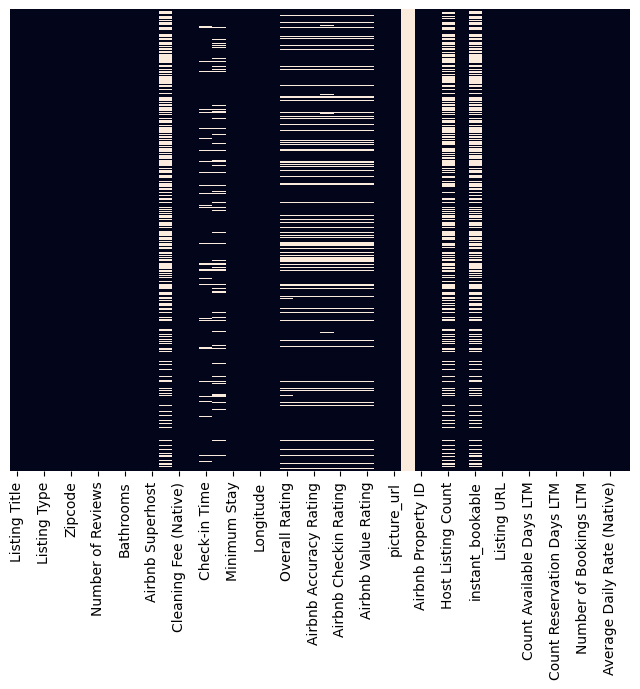

In [43]:
sns.heatmap(airbnb_ldn.isnull(), yticklabels=False, cbar=False)

It can be seen that there are null values in many of the rows. There are definitely patterns, with null values in particular columns, coinciding with null values in other columns.

To being with, there is a constant null column, between 'picture_url' and 'airbnb property id'. Looking at the original dataframe, this complete null column looks to be the 'license' column. Looking at the previously produced info table,there are 0 non-null values; License column with therefore be dropped.

In [44]:
# drop licence column
airbnb_ldn.drop(columns = 'License', inplace=True)

There are many lines of data that have null avlues for all of the different 'rating' columns. For the purpose of this model, the rating component will be essential to the ultimate output. Hence, columns that do not have this relevant information will be useful for any form of insights. All columns that have null values for all rating rows will be dropped:

In [45]:
# return columns that have null values for all rating rows:

airbnb_ldn[airbnb_ldn[['Overall Rating', 
            'Airbnb Communication Rating', 
            'Airbnb Accuracy Rating', 
            'Airbnb Cleanliness Rating',
            'Airbnb Checkin Rating',
            'Airbnb Location Rating',
            'Airbnb Value Rating']].isnull().any(axis=1)]

,Listing Title,Property Type,Listing Type,City,Zipcode,Currency Native,Number of Reviews,Bedrooms,Bathrooms,Max Guests,Airbnb Superhost,Cancellation Policy,Cleaning Fee (Native),Extra People Fee(Native),Check-in Time,Checkout Time,Minimum Stay,Latitude,Longitude,Exact Location,Overall Rating,Airbnb Communication Rating,Airbnb Accuracy Rating,Airbnb Cleanliness Rating,Airbnb Checkin Rating,Airbnb Location Rating,Airbnb Value Rating,Amenities,picture_url,Airbnb Property ID,Airbnb Host ID,Host Listing Count,guest_controls,instant_bookable,Pets Allowed,Listing URL,Instantbook Enabled,Count Available Days LTM,Count Blocked Days LTM,Count Reservation Days LTM,Occupancy Rate LTM,Number of Bookings LTM,Number of Bookings LTM - Number of observed month,Average Daily Rate (Native),Annual Revenue LTM (Native)
0,Twin Ensuite with Shower at Colnbrook Lodge Gu...,Private room in guesthouse,private_room,Colnbrook,SL3 0,GBP,0,1,1,2,f,NaN,0.0,0.0,3:00 PM - 11:00 PM,11:00 AM,1,51.479570,-0.501750,f,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"['Free parking on premises', 'Wifi', 'Breakfas...",https://a0.muscache.com/im/pictures/prohost-ap...,53931060,436870537,0.0,"{""allows_children"": true, ""allows_infants"": tr...",NaN,False,http://airbnb.com/rooms/53931060,False,0,365,0,28,0,4,94.8,690.5
3,Chessington World of Adventures House,Entire home,entire_home,Greater London,KT9 2,GBP,2,3,2,5,f,strict_14_with_grace_period,42.7,0.0,NaN,11:00 AM,6,51.356640,-0.313630,f,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"['Free parking on premises', 'Air conditioning...",https://a0.muscache.com/im/pictures/58907573-b...,41844777,330764063,0.0,"{""allows_children"": true, ""allows_infants"": tr...",0.0,True,http://airbnb.com/rooms/41844777,False,11,354,5,55,0,3,120.9,774.2
13,Semi-detached house （en-suite bathroom room),Private room in home,private_room,Surrey,KT19 9,GBP,0,1,1,2,f,NaN,0.0,0.0,NaN,NaN,1,51.363000,-0.284000,t,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"['Free parking on premises', 'Wifi', 'TV', 'Sm...",https://a0.muscache.com/im/pictures/hosting/Ho...,954806295928525311,531004914,NaN,"{""allows_children"": false, ""allows_infants"": f...",NaN,False,http://airbnb.com/rooms/954806295928525311,False,38,327,17,54,4,3,60.0,1232.4
16,Catsit in exchange for cheap stay,Private room in rental unit,private_room,Feltham,TW13 4,GBP,0,1,1,5,f,NaN,0.0,0.0,After 4:00 PM,NaN,2,51.433754,-0.425476,f,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"['Free parking on premises', 'Wifi', 'Kitchen'...",https://a0.muscache.com/im/pictures/f0f5657d-8...,890729875223125740,30482986,NaN,"{""allows_children"": true, ""allows_infants"": fa...",NaN,False,http://airbnb.com/rooms/890729875223125740,False,11,354,8,87,0,0,43.5,415.5
20,Bright And Peaceful Home With Parking,Entire home,entire_home,Greater London,TW12 3,GBP,0,2,2,4,f,NaN,0.0,0.0,After 4:00 PM,11:00 AM,3,51.423084,-0.378984,f,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"['Free parking on premises', 'Wifi', 'Kitchen'...",https://a0.muscache.com/im/pictures/miso/Hosti...,786849237555479337,492165194,NaN,"{""allows_children"": false, ""allows_infants"": f...",NaN,False,http://airbnb.com/rooms/786849237555479337,False,75,290,60,96,8,3,114.6,8247.6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43564,"Large 3 bedroom house, 2 toilet great location",Entire home,entire_home,Greater London,RM3 8,GBP,0,4,3,7,f,strict_14_with_grace_period,117.7,9.4,NaN,NaN,3,51.600480,0.227930,f,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"['Free parking on premises', 'Wifi', 'Kitchen'...",https://a0.muscache.com/im/pictures/5057ac2a-1...,42579503,19826493,80.0,"{""allows_children"": true, ""allows_infants"": tr...",0.0,False,http://airbnb.com/rooms/42579503,False,43,322,6,17,2,-8,229.9,1915.8
43567,Good,Private room,private_room,Romford,RM3 9,GBP,0,0,0,2,f,flexible,0.0,0.0,After 11:00 AM,11:00 AM,1,51.604640,0.236070,f,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"['Free parking on premises', 'Wifi', 'Breakfas...",http

In [46]:
# drop all rows with null values in 'Overall Rating' column:
airbnb_ldn.dropna(subset=['Overall Rating'], inplace=True)

In [47]:
airbnb_ldn.shape

(37104, 45)

The instant bookable column also contains many null values, this column will be dropped:

In [48]:
airbnb_ldn.drop(columns= 'instant_bookable', inplace=True)

Drop 'currency native' column, it does not add any value:

In [49]:
airbnb_ldn.drop(columns = 'Currency Native', inplace=True)

Drop property ID column (it does not add any particular value to the dataframe and potential analysis):

In [50]:
airbnb_ldn.drop(columns = 'Airbnb Property ID', inplace = True)

Drop listing url:

In [51]:
airbnb_ldn.drop(columns = 'Listing URL', inplace = True)

In [52]:
# drop 'Exact Location'
airbnb_ldn.drop(columns='Exact Location', inplace=True)

In [53]:
# drop picture_url and instantboot enabled
airbnb_ldn.drop(columns = ['picture_url', 'Instantbook Enabled'], inplace=True)

In [54]:
# 

In [55]:
airbnb_ldn.head()

,Listing Title,Property Type,Listing Type,City,Zipcode,Number of Reviews,Bedrooms,Bathrooms,Max Guests,Airbnb Superhost,Cancellation Policy,Cleaning Fee (Native),Extra People Fee(Native),Check-in Time,Checkout Time,Minimum Stay,Latitude,Longitude,Overall Rating,Airbnb Communication Rating,Airbnb Accuracy Rating,Airbnb Cleanliness Rating,Airbnb Checkin Rating,Airbnb Location Rating,Airbnb Value Rating,Amenities,Airbnb Host ID,Host Listing Count,guest_controls,Pets Allowed,Count Available Days LTM,Count Blocked Days LTM,Count Reservation Days LTM,Occupancy Rate LTM,Number of Bookings LTM,Number of Bookings LTM - Number of observed month,Average Daily Rate (Native),Annual Revenue LTM (Native)
1,Single Shared Bathroom at Colnbrook Lodge Gues...,Private room in guesthouse,private_room,Colnbrook,SL3 0,1,1,1,1,f,NaN,0.0,0.0,3:00 PM - 11:00 PM,11:00 AM,1,51.47969,-0.50186,4.0,8.0,8.0,10.0,8.0,8.0,6.0,"['Free parking on premises', 'Wifi', 'Breakfas...",436870537,0.0,"{""allows_children"": true, ""allows_infants"": tr...",False,12,353,4,44,0,3,52.9,884.8
2,Luxury New Alpine Lodge in Private Walled Garden,Entire cabin,entire_home,Claygate,KT10 0,14,1,1,4,t,NaN,0.0,0.0,1:00 PM - 9:00 PM,11:00 AM,1,51.35414,-0.32597,4.8,10.0,9.0,10.0,10.0,10.0,10.0,"['Wifi', 'Kitchen', 'Dryer', 'Dedicated worksp...",47339242,NaN,"{""allows_children"": true, ""allows_infants"": tr...",True,143,222,36,30,8,4,161.2,6914.1
4,Charming house -15min to London,Private room in home,private_room,Chessington,KT9 2,46,1,1,1,f,NaN,0.0,0.0,4:00 PM - 10:00 PM,9:00 AM,1,51.35778,-0.31369,5.0,10.0,10.0,10.0,10.0,10.0,10.0,"['Kitchen', 'Dedicated workspace', 'Hangers', ...",84138704,1.0,"{""allows_children"": false, ""allows_infants"": f...",False,365,0,163,54,103,93,36.3,7162.9
5,Wimbledon Terrace,Entire home,entire_home,Greater London,KT9 2,7,3,2,5,f,flexible,38.7,0.0,After 3:00 PM,11:00 AM,6,51.35816,-0.31400,4.7,10.0,9.0,9.0,10.0,10.0,10.0,"['Free parking on premises', 'Air conditioning...",330764063,0.0,"{""allows_children"": true, ""allows_infants"": tr...",True,11,354,5,55,0,3,188.0,1137.6
6,Family House in Chessington,Entire home,entire_home,Greater London,KT9 2,24,4,2,7,f,NaN,0.0,0.0,After 3:00 PM,11:00 AM,2,51.36328,-0.30738,5.0,10.0,10.0,10.0,10.0,10.0,10.0,"['Free parking on premises', 'Wifi', 'Kitchen'...",171257742,NaN,"{""allows_children"": true, ""allows_infants"": tr...",False,170,195,116,82,23,21,297.0,41407.1


Check for duplicate rows:

In [56]:
airbnb_ldn.duplicated().sum()

0

There are 0 duplicated rows, hence all rows can remain for EDA.

## Performing some initial EDA

- Identifying target column will be appropriate rental amount.
- Many columns can be considered feature columns, as their values will have some impact on the value of the rental quantity.

To begin, a histogram will be created to look at the relative quantities of postcodes to see if any postcodes are particularly popular:

In [57]:
popular_postcodes = airbnb_ldn['Zipcode'].value_counts()[airbnb_ldn['Zipcode'].value_counts() > 100]

In [64]:
popular_postcodes

Zipcode
W2 3     433
SW5 9    356
W2 4     327
SW5 0    278
W2 1     240
        ... 
E9 5     105
E5 0     104
N1 5     103
E1 6     102
E8 2     101
Name: count, Length: 76, dtype: int64

<Axes: xlabel='count', ylabel='Count'>

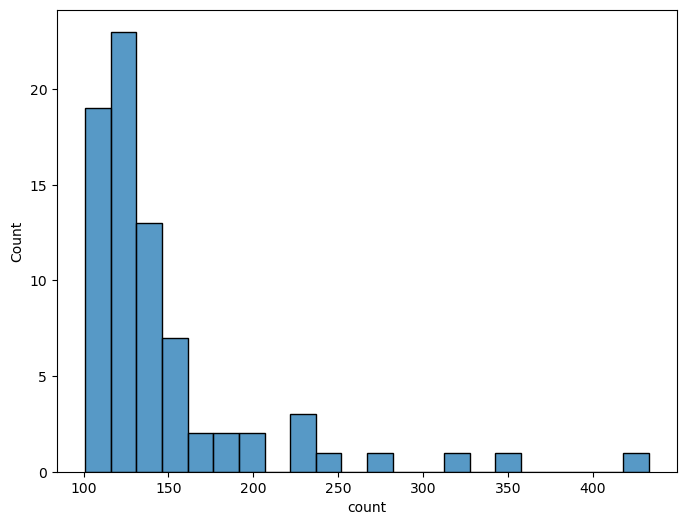

In [58]:
# plot hist of these values:
sns.histplot(airbnb_ldn, x = popular_postcodes)

# return to this, try to get it so that the actual postcode value appears on the x-axis.

In [59]:
# plot graph of anual revenue against overall rating


In [60]:
# find the average location rating for different postcodes:
zip_values = airbnb_ldn['Zipcode'].value_counts()

Return to the postcode stuff - try and group the different postcodes together that have more than 100 properties. Then find the average rent for them. 
- Can try and find the average rent now
- group based on postcode/city? Then find the average rent 

In [98]:
# creating new dataframe for average daily rental rates for different london postcodes 
avg_rent_per_postcode = airbnb_ldn.groupby('Zipcode')['Average Daily Rate (Native)'].mean().reset_index()[avg_rent_per_postcode['Average Daily Rate (Native)'] > 100].sort_values(by='Average Daily Rate (Native)', ascending=False)

C:\Users\blcm9\AppData\Local\Temp\ipykernel_8668\1762312862.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  avg_rent_per_postcode = airbnb_ldn.groupby('Zipcode')['Average Daily Rate (Native)'].mean().reset_index()[avg_rent_per_postcode['Average Daily Rate (Native)'] > 100].sort_values(by='Average Daily Rate (Native)', ascending=False)


In [99]:
# view average daily rental rate per postcode dataframe 
avg_rent_per_postcode

,Zipcode,Average Daily Rate (Native)
917,W1J 9,863.620000
533,RM4 1,801.900000
912,W1J 0,707.050000
928,W1S 4,628.100000
892,W1C 1,615.608333
...,...,...
634,SE5 9,100.656579
302,IG1 2,100.305405
62,DA14 4,100.214286
254,EN5 5,100.114286


In [106]:
# There are 697 rows that have rental values > £100 per night. Lets just view the top 50
top_50_daily_rent = avg_rent_per_postcode.head(25)

Text(0.5, 1.0, 'Top 50 Postcodes with Largest Average Nightly Rental Amount')

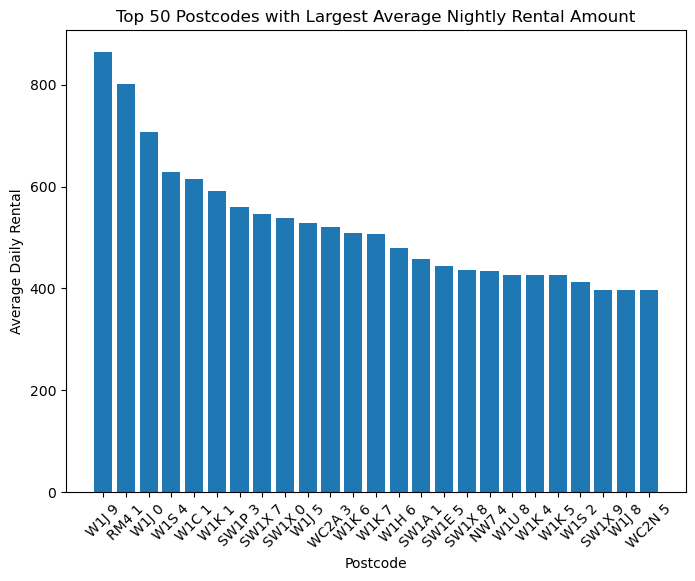

In [111]:
plt.show()
plt.bar(top_50_daily_rent['Zipcode'],
        top_50_daily_rent['Average Daily Rate (Native)'])
plt.xticks(rotation=45)
plt.xlabel('Postcode')
plt.ylabel('Average Daily Rental')
plt.title('Top 50 Postcodes with Largest Average Nightly Rental Amount')

All but one postcode (RM4 1), have a 'West' postcode componant. Consisting of the 4 'West' postcodes: 'W', 'SW', 'NW', 'WC'.

Lets investigate the single none west postcode:

In [117]:
# Checking the 'RM4 1' listed property:
airbnb_ldn[airbnb_ldn['Zipcode'] == 'RM4 1']

,Listing Title,Property Type,Listing Type,City,Zipcode,Number of Reviews,Bedrooms,Bathrooms,Max Guests,Airbnb Superhost,Cancellation Policy,Cleaning Fee (Native),Extra People Fee(Native),Check-in Time,Checkout Time,Minimum Stay,Latitude,Longitude,Overall Rating,Airbnb Communication Rating,Airbnb Accuracy Rating,Airbnb Cleanliness Rating,Airbnb Checkin Rating,Airbnb Location Rating,Airbnb Value Rating,Amenities,Airbnb Host ID,Host Listing Count,guest_controls,Pets Allowed,Count Available Days LTM,Count Blocked Days LTM,Count Reservation Days LTM,Occupancy Rate LTM,Number of Bookings LTM,Number of Bookings LTM - Number of observed month,Average Daily Rate (Native),Annual Revenue LTM (Native)
43532,Georgian Listed Elliptical Villa,Entire villa,entire_home,Havering-atte-Bower,RM4 1,4,6,3,10,f,moderate,48.2,11.9,After 3:00 PM,12:00 PM,5,51.61746,0.18738,5.0,10.0,10.0,10.0,10.0,10.0,10.0,"['Free parking on premises', 'Wifi', 'Kitchen'...",403425793,1.0,"{""allows_children"": true, ""allows_infants"": tr...",True,33,332,5,18,1,-9,801.9,4811.1


There is only one property within the RM4 1 postcode listed on Airbnb. This property has a very high rental income and hence skews the actual value of the area. This property can be considered an anomoly and hence can be ommitted.

Can consider that all of the most expensive rental properties are based in a 'W' postcode. Let's investigate the average cost of different zones based on their postcode:

In [224]:
gl_properties = airbnb_ldn[airbnb_ldn['Zipcode'].str.slice(0, 3).str.contains('W')]

In [225]:
gl_properties.shape

(19783, 38)

In [223]:
airbnb_ldn.shape

(37104, 38)

In [250]:
gl_airbnb = airbnb_ldn[airbnb_ldn['Zipcode'].str.slice(0,1).str.contains('W') |
            airbnb_ldn['Zipcode'].str.slice(0,1).str.contains('E') |
            airbnb_ldn['Zipcode'].str.slice(0,2).str.contains('SE') |
            airbnb_ldn['Zipcode'].str.slice(0,2).str.contains('SW') |
            airbnb_ldn['Zipcode'].str.slice(0,2).str.contains('NE') |
            airbnb_ldn['Zipcode'].str.slice(0,1).str.contains('N') |
            airbnb_ldn['Zipcode'].str.slice(0,2).str.contains('NW') |
            airbnb_ldn['Zipcode'].str.slice(0,2).str.contains('WC') |
            airbnb_ldn['Zipcode'].str.slice(0,3).str.contains('EC') 
            ]

In [265]:
# Create dataframes for each of the different postcode combinations in London:
w_zip = gl_airbnb[gl_airbnb['Zipcode'].str.slice(0,1).str.contains('W') &
                    ~gl_airbnb['Zipcode'].str.slice(1,2).str.contains('C')]

n_zip = gl_airbnb[gl_airbnb['Zipcode'].str.slice(0,1).str.contains('N') &
                    ~gl_airbnb['Zipcode'].str.slice(1,2).str.contains('E') &
                    ~gl_airbnb['Zipcode'].str.slice(1,2).str.contains('W')]

e_zip = gl_airbnb[gl_airbnb['Zipcode'].str.slice(0,1).str.contains('E') &
                    ~gl_airbnb['Zipcode'].str.slice(1,2).str.contains('C')]

wc_zip = gl_airbnb[gl_airbnb['Zipcode'].str.contains('WC')]

nw_zip = gl_airbnb[gl_airbnb['Zipcode'].str.slice(0,2).str.contains('NW')]

sw_zip = gl_airbnb[gl_airbnb['Zipcode'].str.slice(0,2).str.contains('SW')]

se_zip = gl_airbnb[gl_airbnb['Zipcode'].str.slice(0,2).str.contains('SE')]

ec_zip = gl_airbnb[gl_airbnb['Zipcode'].str.slice(0,2).str.contains('EC')]





In [266]:
print(f"The average daily rental rate for all 'W' postcodes is £{w_zip['Average Daily Rate (Native)'].mean()}")
print(f"The average daily rental rate for all 'N' postcodes is £{n_zip['Average Daily Rate (Native)'].mean()}")
print(f"The average daily rental rate for all 'E' postcodes is £{e_zip['Average Daily Rate (Native)'].mean()}")
print(f"The average daily rental rate for all 'WC' postcodes is £{wc_zip['Average Daily Rate (Native)'].mean()}")
print(f"The average daily rental rate for all 'NW' postcodes is £{nw_zip['Average Daily Rate (Native)'].mean()}")
print(f"The average daily rental rate for all 'SW' postcodes is £{sw_zip['Average Daily Rate (Native)'].mean()}")
print(f"The average daily rental rate for all 'SE' postcodes is £{se_zip['Average Daily Rate (Native)'].mean()}")
print(f"The average daily rental rate for all 'EC' postcodes is £{ec_zip['Average Daily Rate (Native)'].mean()}")

The average daily rental rate for all 'W' postcodes is £208.4625910429258
The average daily rental rate for all 'N' postcodes is £131.09685575364668
The average daily rental rate for all 'E' postcodes is £130.7657142857143
The average daily rental rate for all 'WC' postcodes is £244.98053691275166
The average daily rental rate for all 'NW' postcodes is £152.17219574197645
The average daily rental rate for all 'SW' postcodes is £199.56675015654352
The average daily rental rate for all 'SE' postcodes is £127.43580712788258
The average daily rental rate for all 'EC' postcodes is £192.2149885583524


In [263]:
airbnb_ldn[airbnb_ldn['Zipcode'] == 'NE']

,Listing Title,Property Type,Listing Type,City,Zipcode,Number of Reviews,Bedrooms,Bathrooms,Max Guests,Airbnb Superhost,Cancellation Policy,Cleaning Fee (Native),Extra People Fee(Native),Check-in Time,Checkout Time,Minimum Stay,Latitude,Longitude,Overall Rating,Airbnb Communication Rating,Airbnb Accuracy Rating,Airbnb Cleanliness Rating,Airbnb Checkin Rating,Airbnb Location Rating,Airbnb Value Rating,Amenities,Airbnb Host ID,Host Listing Count,guest_controls,Pets Allowed,Count Available Days LTM,Count Blocked Days LTM,Count Reservation Days LTM,Occupancy Rate LTM,Number of Bookings LTM,Number of Bookings LTM - Number of observed month,Average Daily Rate (Native),Annual Revenue LTM (Native)


In [181]:
airbnb_ldn['Zipcode'].nunique()

1022

In [140]:
print(f"The average daily rental rate for postcodes that contain a 'W', is £{w_zip['Average Daily Rate (Native)'].mean()}")
print(f"The average daily rental rate for postcodes that contain a 'E', is £{e_zip['Average Daily Rate (Native)'].mean()}")
print(f"The average daily rental rate for postcodes that contain a 'S', is £{s_zip['Average Daily Rate (Native)'].mean()}")
print(f"The average daily rental rate for postcodes that contain a 'N', is £{n_zip['Average Daily Rate (Native)'].mean()}")

The average daily rental rate for postcodes that contain a 'W', is £194.09751807107114
The average daily rental rate for postcodes that contain a 'E', is £137.1814190727753
The average daily rental rate for postcodes that contain a 'S', is £171.39348193697157
The average daily rental rate for postcodes that contain a 'N', is £143.82235663082437
